In [402]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
warnings.filterwarnings('ignore')

In [403]:
dados = pd.read_csv('Flipkart_Mobiles.csv')

In [404]:
dados

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990
...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989


In [405]:
dados.isnull().any()

Brand             False
Model             False
Color             False
Memory             True
Storage            True
Rating            False
Selling Price     False
Original Price    False
dtype: bool

In [406]:
dados = dados.fillna(lambda x: x.median())

In [407]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           3114 non-null   object 
 1   Model           3114 non-null   object 
 2   Color           3114 non-null   object 
 3   Memory          3114 non-null   object 
 4   Storage         3114 non-null   object 
 5   Rating          3114 non-null   float64
 6   Selling Price   3114 non-null   int64  
 7   Original Price  3114 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 194.8+ KB


### Preprocessamento

In [408]:
#Por enquanto será removido a coluna Color e Original Price
dados = dados.drop(['Color', 'Original Price'], axis=1)

In [409]:
#Informações de conjunto de preços dos Smartphones
dados['Selling Price'].describe()

count      3114.000000
mean      26436.625562
std       30066.892622
min        1000.000000
25%        9990.000000
50%       15000.000000
75%       28999.000000
max      179900.000000
Name: Selling Price, dtype: float64

In [410]:
dados.isnull().sum()

Brand            0
Model            0
Memory           0
Storage          0
Rating           0
Selling Price    0
dtype: int64

In [411]:
#Removendo valores nulos
dados = dados[~dados.isnull()]

# Transformando a coluna Memory e Storage em valores float.

In [412]:
dados['Memory']=dados['Memory'].str.replace(" GB","")
dados['Memory']=dados['Memory'].str.replace(" MB","")
dados['Memory']=dados['Memory'].str.replace("GB","")
dados['Memory']=dados['Memory'].astype(float)

In [413]:
dados = dados.dropna()

In [414]:
dados = dados.dropna(subset=['Memory'])

In [415]:
print(dados[dados['Storage'].isnull()])

Empty DataFrame
Columns: [Brand, Model, Memory, Storage, Rating, Selling Price]
Index: []


In [416]:
dados = dados.dropna(subset=['Storage'])

In [417]:
dados['Storage']=dados['Storage'].str.replace(" GB","")
dados['Storage']=dados['Storage'].str.replace(" MB","")
dados['Storage']=dados['Storage'].str.replace("GB","")
dados['Storage']=dados['Storage'].str.replace(" TB","")
#dados["Storage"]= dados["Storage"].fillna(0).astype(int)
dados['Storage']=dados['Storage'].astype(float)

In [418]:
dados = dados.dropna(subset=['Rating'])

In [419]:
dados["Rating"]= dados["Rating"].fillna(0).astype(float)

In [420]:
dados['Rating']=dados['Rating'].astype(str).astype(float)

In [421]:
dados= dados.dropna(axis= 0, how='any')

concatenando coluna Brand + coluna Model para que a seleção para facilitar na predição.

In [422]:
dados['modelBrand'] = dados['Brand']+" "+dados['Model']
dados.drop(['Model'], axis=1)
dados['Model'] = dados['modelBrand']

In [423]:
dados = dados.drop(columns=['modelBrand'], axis=1)

In [424]:
dados

,Brand,Model,Memory,Storage,Rating,Selling Price
0,OPPO,OPPO A53,4.0,64.0,4.5,11990
1,OPPO,OPPO A53,4.0,64.0,4.5,11990
2,OPPO,OPPO A53,6.0,128.0,4.3,13990
3,OPPO,OPPO A53,6.0,128.0,4.3,13990
4,OPPO,OPPO A53,4.0,64.0,4.5,11990
...,...,...,...,...,...,...
3109,SAMSUNG,SAMSUNG M52 5G,6.0,128.0,4.3,25990
3110,SAMSUNG,SAMSUNG M52 5G,6.0,128.0,4.3,25489
3111,SAMSUNG,SAMSUNG M52 5G,8.0,128.0,4.3,27239
3112,SAMSUNG,SAMSUNG M52 5G,8.0,128.0,4.2,22989


# Alterando o nome dos dados da coluna Model, assim facilitando no processamento dos dados

In [425]:
dados['Model']=dados['Model'].str.split().str.slice(start=0,stop=3).str.join(' ')

# Resetando os indices com dados limpos

In [426]:
dados=dados.reset_index(drop=True)

# Salvando dados limpos em novo arquivo .csv

In [427]:
dados.to_csv('novo_dados.csv')

In [428]:
#Dividindo a base de dados em 2 partes. Dependentes e Independentes para o treinamento

X=dados[['Brand', 'Model', 'Memory', 'Storage', 'Rating']]
y=dados['Selling Price']

In [429]:
X

,Brand,Model,Memory,Storage,Rating
0,OPPO,OPPO A53,4.0,64.0,4.5
1,OPPO,OPPO A53,4.0,64.0,4.5
2,OPPO,OPPO A53,6.0,128.0,4.3
3,OPPO,OPPO A53,6.0,128.0,4.3
4,OPPO,OPPO A53,4.0,64.0,4.5
...,...,...,...,...,...
3079,SAMSUNG,SAMSUNG M52 5G,6.0,128.0,4.3
3080,SAMSUNG,SAMSUNG M52 5G,6.0,128.0,4.3
3081,SAMSUNG,SAMSUNG M52 5G,8.0,128.0,4.3
3082,SAMSUNG,SAMSUNG M52 5G,8.0,128.0,4.2


In [430]:
y.shape

(3084,)

In [431]:
dados.describe(include='all')

,Brand,Model,Memory,Storage,Rating,Selling Price
count,3084,3084,3084.000000,3084.000000,3084.000000,3084.000000
unique,17,773,NaN,NaN,NaN,NaN
top,SAMSUNG,Apple iPhone 13,NaN,NaN,NaN,NaN
freq,696,75,NaN,NaN,NaN,NaN
mean,NaN,NaN,14.211900,89.487776,4.248022,26630.770428
std,NaN,NaN,70.326288,92.996021,0.271574,30113.952848
min,NaN,NaN,1.000000,1.000000,2.300000,1000.000000
25%,NaN,NaN,3.000000,32.000000,4.100000,9999.000000
50%,NaN,NaN,4.000000,64.000000,4.300000,15405.000000
75%,NaN,NaN,6.000000,128.000000,4.400000,28999.000000


In [432]:
dados['Brand'].unique()

array(['OPPO', 'HTC', 'IQOO', 'Google Pixel', 'LG', 'ASUS', 'realme',
       'GIONEE', 'Nokia', 'Apple', 'SAMSUNG', 'Lenovo', 'Motorola',
       'POCO', 'vivo', 'Xiaomi', 'Infinix'], dtype=object)

# Relação de Preço de venda com a marca

<AxesSubplot: xlabel='Selling Price', ylabel='Brand'>

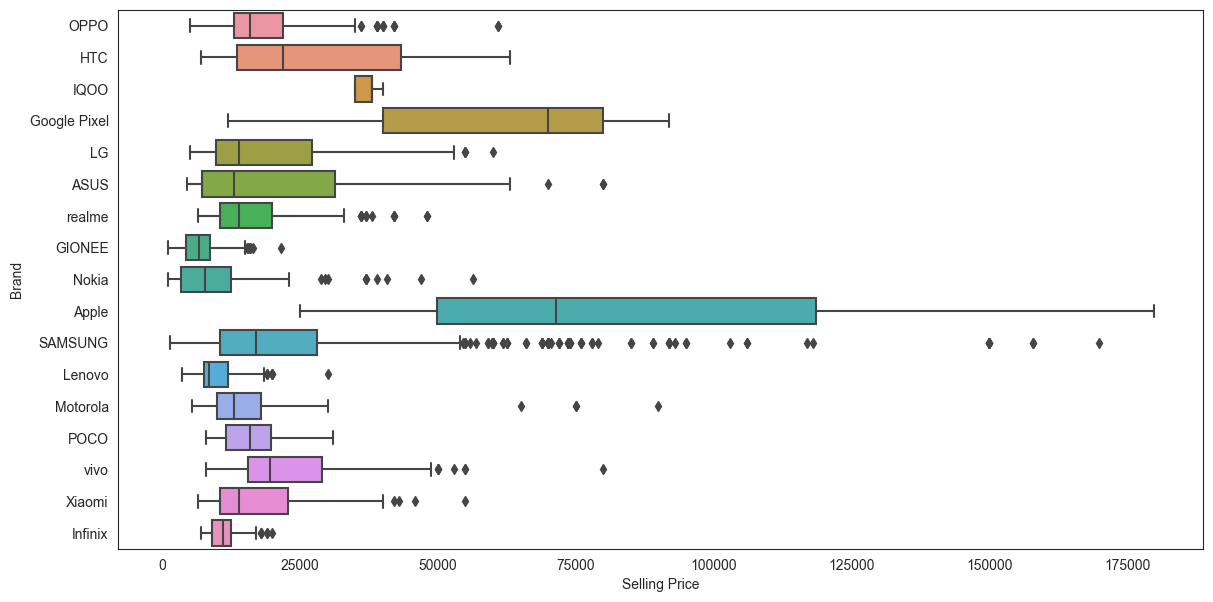

In [433]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='Selling Price',y='Brand',data=dados)

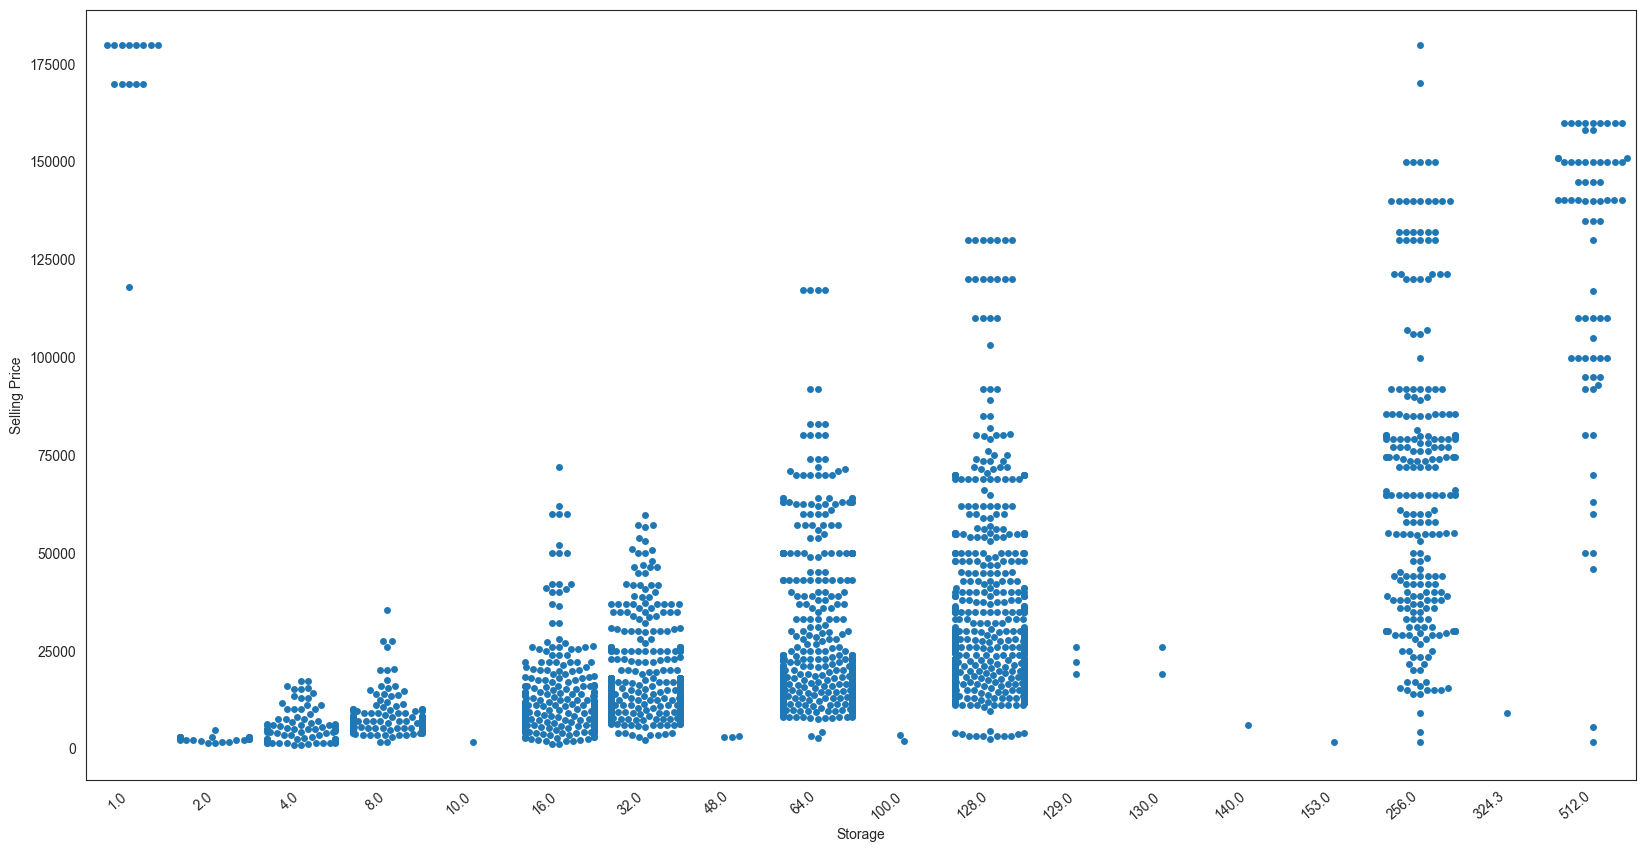

In [434]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='Storage',y='Selling Price',data=dados)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

# Aplicando train, test

In [435]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [436]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

# Categorizando coluna Brand e Model

In [437]:
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['Brand','Model']])

OneHotEncoder(handle_unknown='ignore')

# Transformando as colunas em categorias

In [438]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Brand','Model']),
                                    remainder='passthrough')

# Modelo de regressao linear

In [439]:
lr=LinearRegression()

# Usando um pipeline

In [440]:
pipe=make_pipeline(column_trans,lr)

In [441]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['ASUS', 'Apple', 'GIONEE', 'Google Pixel', 'HTC', 'IQOO',
       'Infinix', 'LG', 'Lenovo', 'Motorola', 'Nokia', 'OPPO', 'POCO',
       'SAMSUNG', 'Xiaomi', 'realme', 'vivo'], dtype=object),
                                                                            array(['ASUS 6Z', 'ASUS ROG', 'ASUS ROG 5s', 'ASUS ROG Pho...
       'vivo Y20G', 'vivo Y20G 2021', 'vivo Y21', 'vivo Y21A',
       'vivo Y21T', 'vivo Y30', 'vivo Y31', 'vivo Y33T', 'vivo Y33s',
       'vivo Y51A', 'vivo Y53s', 'vivo Y69', 'vivo Y71i', 'vivo Y72 5G',
       'vivo Y73', 'vivo Y75 5G', 'vivo Y83', 'vivo Y83 Pro', 'vivo Y90',
       'vivo Y91i', 'vivo Y93', 'vivo Y94', 'vivo Y95', 'vivo Z1 Pro',
       'vivo Z1x'], dtype=object)]),
                                                  ['Brand', 'Model'])])),
                ('linearregression', LinearRegression())])

In [442]:
pipe=make_pipeline(column_trans,lr)

In [443]:
y_pred=pipe.predict(X_test)

In [444]:
r2_score(y_test,y_pred)

0.882887383770749

In [445]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [446]:
np.argmax(scores)

806

In [447]:
scores[np.argmax(scores)]

0.9226653452168023

In [448]:
X_test['Model']

2251         Lenovo Vibe P1
931            Nokia 150 DS
170                OPPO A83
1385         Apple iPhone 7
319              LG W41 Pro
               ...         
2168         Lenovo K3 Note
1774      SAMSUNG Galaxy J2
1422        Apple iPhone 6s
1954      SAMSUNG Galaxy S4
1789    SAMSUNG Galaxy A10s
Name: Model, Length: 309, dtype: object

In [449]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3084 entries, 0 to 3083
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          3084 non-null   object 
 1   Model          3084 non-null   object 
 2   Memory         3084 non-null   float64
 3   Storage        3084 non-null   float64
 4   Rating         3084 non-null   float64
 5   Selling Price  3084 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 144.7+ KB


In [450]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['POCO','POCO X3 Pro',6.0,128.0,4.1]).reshape(1,5)))

array([16310.4203543])

In [451]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.9226653452168023

In [452]:
import pickle

In [453]:
pickle.dump(pipe,open('modelo.pkl','wb'))

In [454]:
pipe.predict(pd.DataFrame(columns=['Brand','Model','Memory','Storage','Rating'],data=np.array(['POCO','POCO X3 Pro',6.0,128.0,4.1]).reshape(1,5)))

array([14891.53207715])

In [455]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['ASUS', 'Apple', 'GIONEE', 'Google Pixel', 'HTC', 'IQOO',
       'Infinix', 'LG', 'Lenovo', 'Motorola', 'Nokia', 'OPPO', 'POCO',
       'SAMSUNG', 'Xiaomi', 'realme', 'vivo'], dtype=object)

# KNN - k-nearest neighbours

In [456]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()


In [457]:
X = dados.drop(columns=['Brand', 'Model'], axis=1)
Y = dados['Brand']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [458]:
model.fit(x_train, y_train)

KNeighborsClassifier()

Métrica de performance

In [459]:
from sklearn.model_selection import cross_val_score
scores_dt = cross_val_score(model, X, y, scoring='accuracy', cv=5)
print(scores_dt.mean())

0.6637473952303774


# Decision Tree

In [460]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [461]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

Métrica de performance

In [462]:
scores_dt = cross_val_score(model, X, y, scoring='accuracy', cv=5)
print(scores_dt.mean())

0.8090114504620176
